# <b/> <font color='green'> <center>Vehicle Detection & Counting</center> </font>

## <b/> Import libraires

In [1]:
import numpy as np
import requests
import cv2
from io import BytesIO
from PIL import Image

## <b/> Loading the Car Image

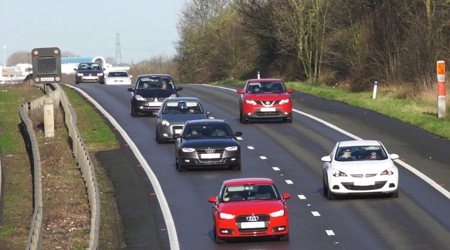

In [2]:
image = Image.open(requests.get('https://images.pexels.com/videos/854671/free-video-854671.jpg', stream=True).raw)
image = image.resize((450, 250))
image_arr = np.array(image)
image

## <b/> Converting Image 

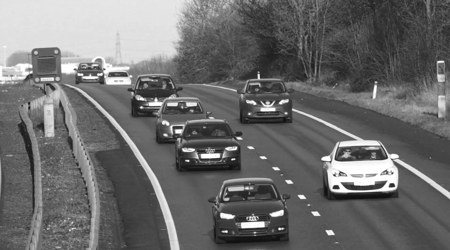

In [3]:
# Into Grayscale
grey = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

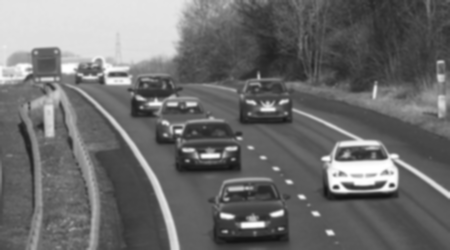

In [4]:
# Gaussian Blur
blur = cv2.GaussianBlur(grey, (5,5), 0)
Image.fromarray(blur)

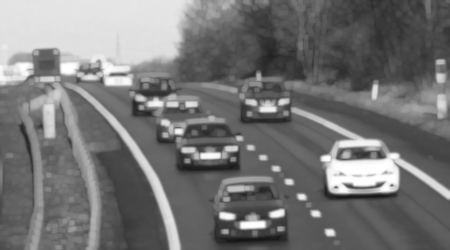

In [5]:
# Dilating the Image
dilated = cv2.dilate(blur, np.ones((3,3)))
Image.fromarray(dilated)

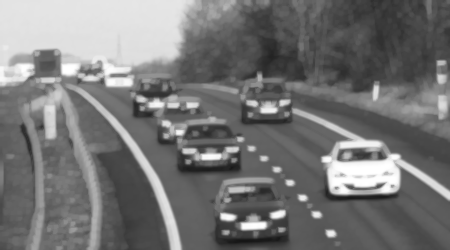

In [6]:
# Morphology Transformation
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)
Image.fromarray(closing)

## <b/> Loading Car Haar Cascade

In [7]:
# Path to the pre-trained Haar Cascade classifier for car detection
car_cascade_src = 'cars.xml'

# Load the Haar Cascade classifier
car_cascade = cv2.CascadeClassifier(car_cascade_src)

# Detect cars in the image using the classifier
cars = car_cascade.detectMultiScale(closing, 1.1, 1)

7  cars found!


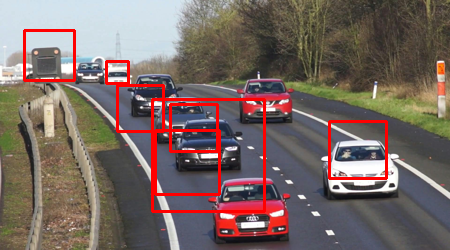

In [8]:
# using above contours to draw rectangles around detected cars
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr, (x,y), (x+w, y+h), (255, 0, 0), 2)
    cnt += 1

print(cnt, " cars found!")
Image.fromarray(image_arr)

* The rectangles are drawn for each car the model detects. Currently model is not that much accurate.

## <b/> Loading the Bus Image

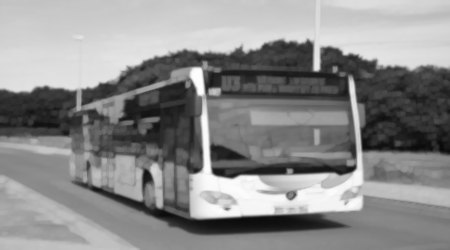

In [9]:
image2 = Image.open(requests.get('https://qph.cf2.quoracdn.net/main-qimg-b5c4e39dcd48dddd9e609e6022f74d85-lq', stream=True).raw)
image2 = image2.resize((450, 250))
image2_arr = np.array(image2)

# Into Grayscale
grey = cv2.cvtColor(image2_arr, cv2.COLOR_BGR2GRAY)

# Gaussian Blur
blur = cv2.GaussianBlur(grey, (5,5), 0)

# Dilating the Image
dilated = cv2.dilate(blur, np.ones((3,3)))

# Morphology Transformation
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)
Image.fromarray(closing)

## <b/> Loading Bus Front Haar Cascade

In [10]:
# Path to the pre-trained Haar Cascade classifier for bus detection
bus_cascade_src = 'Bus_front.xml'

# Load the Haar Cascade classifier
bus_cascade = cv2.CascadeClassifier(bus_cascade_src)

# Detect buses in the image using the classifier
buses = bus_cascade.detectMultiScale(closing, 1.1, 1)

1  bus found!


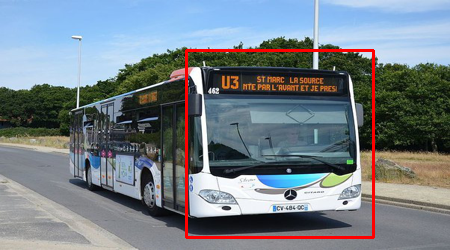

In [11]:
# using above contours to draw rectangles around detected buses
cnt = 0
for (x,y,w,h) in buses:
    cv2.rectangle(image2_arr, (x,y), (x+w, y+h), (255, 0, 0), 2)
    cnt += 1

print(cnt, " bus found!")
Image.fromarray(image2_arr)

## <b/> Cars Detection in Video

In [12]:
# Path to the pre-trained Haar Cascade classifier for car detection
cascade_src = 'cars.xml'

# Path to the input video file
video_src = 'Cars.mp4'

# Create a VideoCapture object to read the video file
cap = cv2.VideoCapture(video_src)

# Load the Haar Cascade classifier
car_cascade = cv2.CascadeClassifier(cascade_src)

# Create a VideoWriter object to save the processed video
video = cv2.VideoWriter('result.avi', cv2.VideoWriter_fourcc(*'DIVX'), 15, (450, 250))

In [13]:
while True:
    # Read a frame from the video capture object
    ret, img = cap.read()
    
    # Break the loop if no frame is returned (end of video)
    if img is None:
        break

    # Convert the frame to grayscale for car detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect cars in the grayscale frame using the Haar Cascade classifier
    cars = car_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=2)

    # Draw rectangles around detected cars
    for (x, y, w, h) in cars:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Write the processed frame to the output video file
    video.write(img)

# Release the video capture and writer objects
cap.release()
video.release()

-----

## <b/> CONCLUSION:
### We started with leading the images and performed different operations on the images. We also used haar cascades to perform object detection. Similarly we can use different haar cascades for different types of object detection.